<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-and-combine-datasets" data-toc-modified-id="Read-and-combine-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read and combine datasets</a></span></li><li><span><a href="#Read-ECCO-data" data-toc-modified-id="Read-ECCO-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read ECCO data</a></span></li><li><span><a href="#Read-Argo-climatology" data-toc-modified-id="Read-Argo-climatology-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read Argo climatology</a></span></li><li><span><a href="#Compare-ECCO-and-Argo-gradients?" data-toc-modified-id="Compare-ECCO-and-Argo-gradients?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compare ECCO and Argo gradients?</a></span><ul class="toc-item"><li><span><a href="#Histograms" data-toc-modified-id="Histograms-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#smooth-argo" data-toc-modified-id="smooth-argo-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>smooth argo</a></span></li></ul></li></ul></div>

# Read and combine datasets

In [4]:
def plot_gradients(input, region):
        
    isokwargs = dict(yincrease=False, cmap=mpl.cm.RdYlBu_r, center=0, robust=True)
    ρkwargs = dict(yincrease=False, levels=50, colors='w')
    TSkwargs = dict(yincrease=False, levels=40, colors='k')

    f, ax = plt.subplots(2, 2, sharex=True, sharey=True)

    f.set_size_inches(12, 8)

    (input.dTiso.sel(**region)
     .plot(ax=ax[0,0], **isokwargs))
    (input.Tmean.sel(**region)
     .plot.contour(ax=ax[0,0], **TSkwargs))
    (input.ρmean.sel(**region)
     .plot.contour(ax=ax[0,0], **ρkwargs))

    (input.dSiso.sel(**region)
     .plot(ax=ax[1,0], **isokwargs))
    (input.Smean.sel(**region)
     .plot.contour(ax=ax[1,0], **TSkwargs))
    (input.ρmean.sel(**region)
     .plot.contour(ax=ax[1,0], **ρkwargs))

    (input.dTdia.sel(**region)
     .plot(ax=ax[0,1], **isokwargs))
    (input.Tmean.sel(**region)
     .plot.contour(ax=ax[0,1], **TSkwargs))
    (input.ρmean.sel(**region)
     .plot.contour(ax=ax[0,1], **ρkwargs))

    (input.dSdia.sel(**region)
     .plot(ax=ax[1,1], **isokwargs))
    (input.Smean.sel(**region)
     .plot.contour(ax=ax[1,1], **TSkwargs))
    (input.ρmean.sel(**region)
     .plot.contour(ax=ax[1,1], **ρkwargs))
    
    [aa.set_xlabel('') for aa in ax[0,:]]
    plt.tight_layout()
    
    plt.suptitle(input.attrs['dataset'], y=1.01)

    return ax

# Read ECCO data

In [1]:
ρfile = '../datasets/ecco/interp_climatology/RHOAnoma.0001.nc'
Sfile = '../datasets/ecco/interp_climatology/SALT.0001.nc'
Tfile = '../datasets/ecco/interp_climatology/THETA.0001.nc'

T = xr.open_dataset(Tfile, autoclose=True,
                    decode_times=False).pipe(ed.format_ecco)
S = xr.open_dataset(Sfile, autoclose=True,
                    decode_times=False).pipe(ed.format_ecco)
ρ = xr.open_dataset(ρfile, autoclose=True,
                    decode_times=False).pipe(ed.format_ecco)

ecc = xr.merge([T, S, ρ]).rename({'THETA': 'Tmean', 'SALT': 'Smean'})

# roll so that pacific is in the middle and we have coverage of all 3 basins
ecc = dcpy.oceans.dataset_center_pacific(ecc)

annual = ecc.mean(dim='time')
annual['ρmean'] = annual.RHOAnoma + 1029 # IN SITU DENSITY ANOMALY!!!!

ed.estimate_clim_gradients(annual)

annual.attrs['name'] = "Mean fields and isopycnal, diapycnal gradients from ECCO v4r3"
annual.attrs['dataset'] = 'ecco'
annual.to_netcdf('../datasets/ecco_annual_iso_gradient.nc')

annual

<xarray.Dataset>
Dimensions:   (lat: 360, lon: 720, pres: 50)
Coordinates:
  * pres      (pres) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 75.0 85.03 ...
  * lat       (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon       (lon) float64 20.25 20.75 21.25 21.75 22.25 22.75 23.25 23.75 ...
Data variables:
    Tmean     (pres, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    Smean     (pres, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    RHOAnoma  (pres, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    ρmean     (pres, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    dTiso     (pres, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    dTdia     (pres, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    dSiso     (pres, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    dSdia     (pres, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    dTdz      (pres, lat, lon) float64

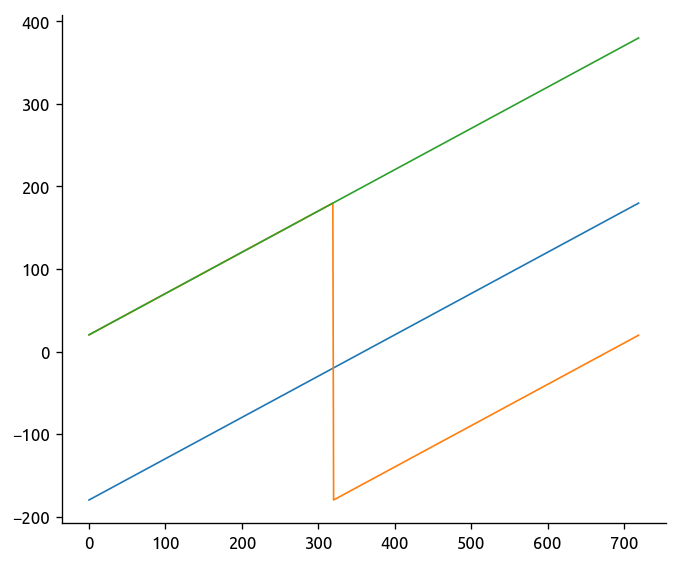

In [26]:
plt.plot(T.lon)

xnew = T.lon.copy()
xnew = xnew.roll(lon=-400)
plt.plot(xnew)

xnew.values[xnew.values < 20] += 360
plt.plot(xnew)

In [37]:
monthly = ecc.sel(time=slice(8, 9)).mean(dim='time')
monthly['ρmean'] = monthly.RHOAnoma + 1029

ed.estimate_clim_gradients(monthly)

monthly.attrs['name'] = "Mean fields and isopycnal, diapycnal gradients from ECCO v4r3"
monthly.attrs['dataset'] = 'ecco'
monthly.to_netcdf('../datasets/ecco_monthly_iso_gradient.nc')

monthly

/home/deepak/anaconda3/lib/python3.6/_collections_abc.py:743: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for key in self._mapping:


ValueError: dimensions ('pres', 'lat', 'lon') must have the same length as the number of data dimensions, ndim=0

/home/deepak/work/python/xarray/xarray/core/computation.py:560: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/deepak/work/python/xarray/xarray/core/computation.py:560: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


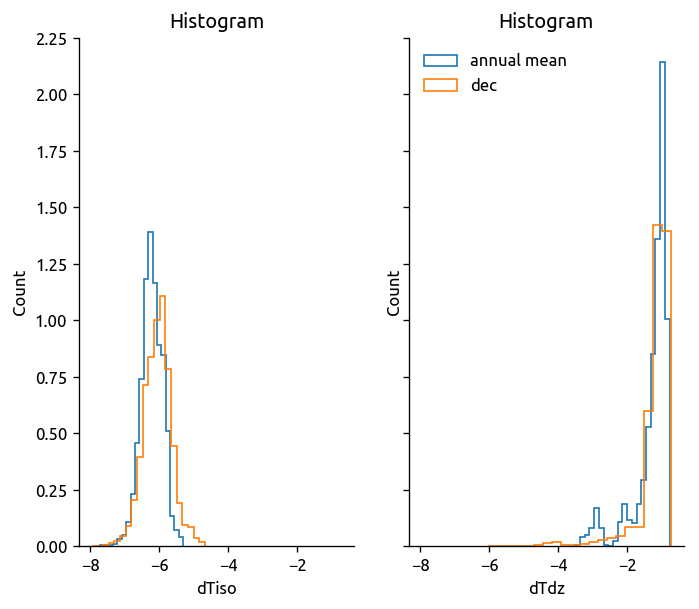

In [15]:
def plot_grad(input, ax):
    (np.log10(input.dTiso).sel(lat=slice(5, 18), lon=slice(82, 92), pres=slice(0, 200))
     .plot.hist(ax=ax[0], bins=20, density=True, histtype='step'))
    
    (np.log10(input.dTdz).sel(lat=slice(5, 18), lon=slice(82, 92), pres=slice(0, 200))
     .plot.hist(ax=ax[1], bins=20, density=True, histtype='step'))
    
f, ax = plt.subplots(1,2, sharex=True, sharey=True)
plot_grad(annual, ax)
plot_grad(monthly, ax)
plt.legend(('annual mean', 'dec'))

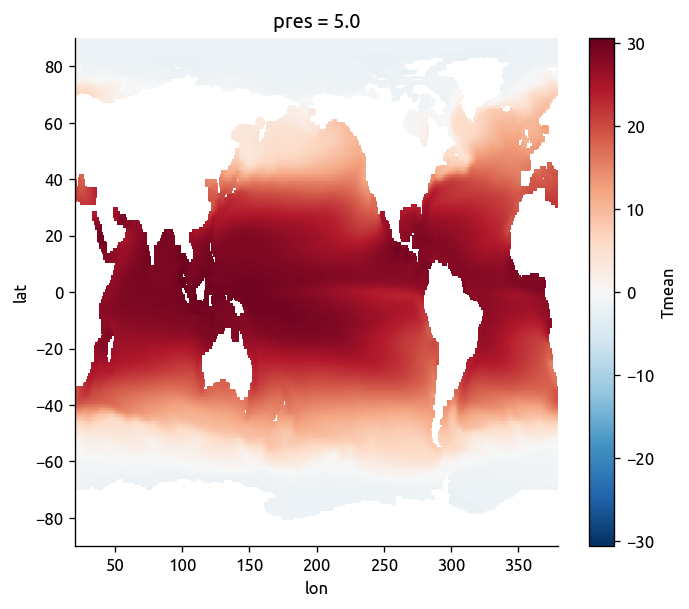

In [41]:
annual.Tmean.sel(pres=0, method='nearest').plot()

# Read Argo climatology

In [2]:
argoT = xr.open_dataset('../datasets/argoclim/RG_ArgoClim_Temperature_2016.nc',
                        autoclose=True, decode_times=False)
argoS = xr.open_dataset('../datasets/argoclim/RG_ArgoClim_Salinity_2016.nc',
                        autoclose=True, decode_times=False)

argo = xr.merge([argoT, argoS])

argo = (argo.rename({'ARGO_TEMPERATURE_MEAN': 'Tmean',
                    'ARGO_TEMPERATURE_ANOMALY': 'Tanom',
                    'ARGO_SALINITY_MEAN': 'Smean',
                    'ARGO_SALINITY_ANOMALY': 'Sanom',
                    'LATITUDE': 'lat',
                    'LONGITUDE': 'lon',
                    'PRESSURE': 'pres',
                    'TIME': 'time'})
        .mean(dim='time')
        .drop(['BATHYMETRY_MASK', 'Tanom', 'Sanom']))

_, pmat = xr.broadcast(argo.Tmean, argo.pres)

argo['ρmean'] = xr.DataArray(sw.dens(argo.Smean, argo.Tmean, pmat),
                             dims=argo.Smean.dims, coords=argo.Smean.coords)

del pmat

# apply an averaging operator?
ed.estimate_clim_gradients(argo)

argo.attrs['name'] = 'Mean fields, anomalies and isopycnal, diapycnal gradients from Argo climatology'
argo.attrs['dataset'] = 'argo'
argo.to_netcdf('../datasets/argo_annual_iso_gradients.nc')

argo

<xarray.Dataset>
Dimensions:  (lat: 130, lon: 360, pres: 58)
Coordinates:
  * lon      (lon) float32 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5 28.5 29.5 ...
  * lat      (lat) float32 -64.5 -63.5 -62.5 -61.5 -60.5 -59.5 -58.5 -57.5 ...
  * pres     (pres) float32 2.5 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0 ...
Data variables:
    Tmean    (pres, lat, lon) float32 -1.162 -1.163 -1.163 -1.159 -1.155 ...
    Smean    (pres, lat, lon) float32 34.047 34.036 34.028 34.019 34.013 ...
    ρmean    (pres, lat, lon) float32 1027.3987 1027.3899 1027.3834 1027.376 ...
    dTiso    (pres, lat, lon) float32 4.776637e-07 5.226363e-07 5.227222e-07 ...
    dTdia    (pres, lat, lon) float32 0.0008000056 0.0008000057 0.0008000056 ...
    dSiso    (pres, lat, lon) float32 6.8145897e-07 6.324325e-07 ...
    dSdia    (pres, lat, lon) float32 0.0003997804 0.000400289 0.00039978034 ...
    dTdz     (pres, lat, lon) float32 0.00080000557 0.00080000557 ...
    dSdz     (pres, lat, lon) float32 -0.00039978029

# Compare ECCO and Argo gradients?

/home/deepak/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


(2000, 0)

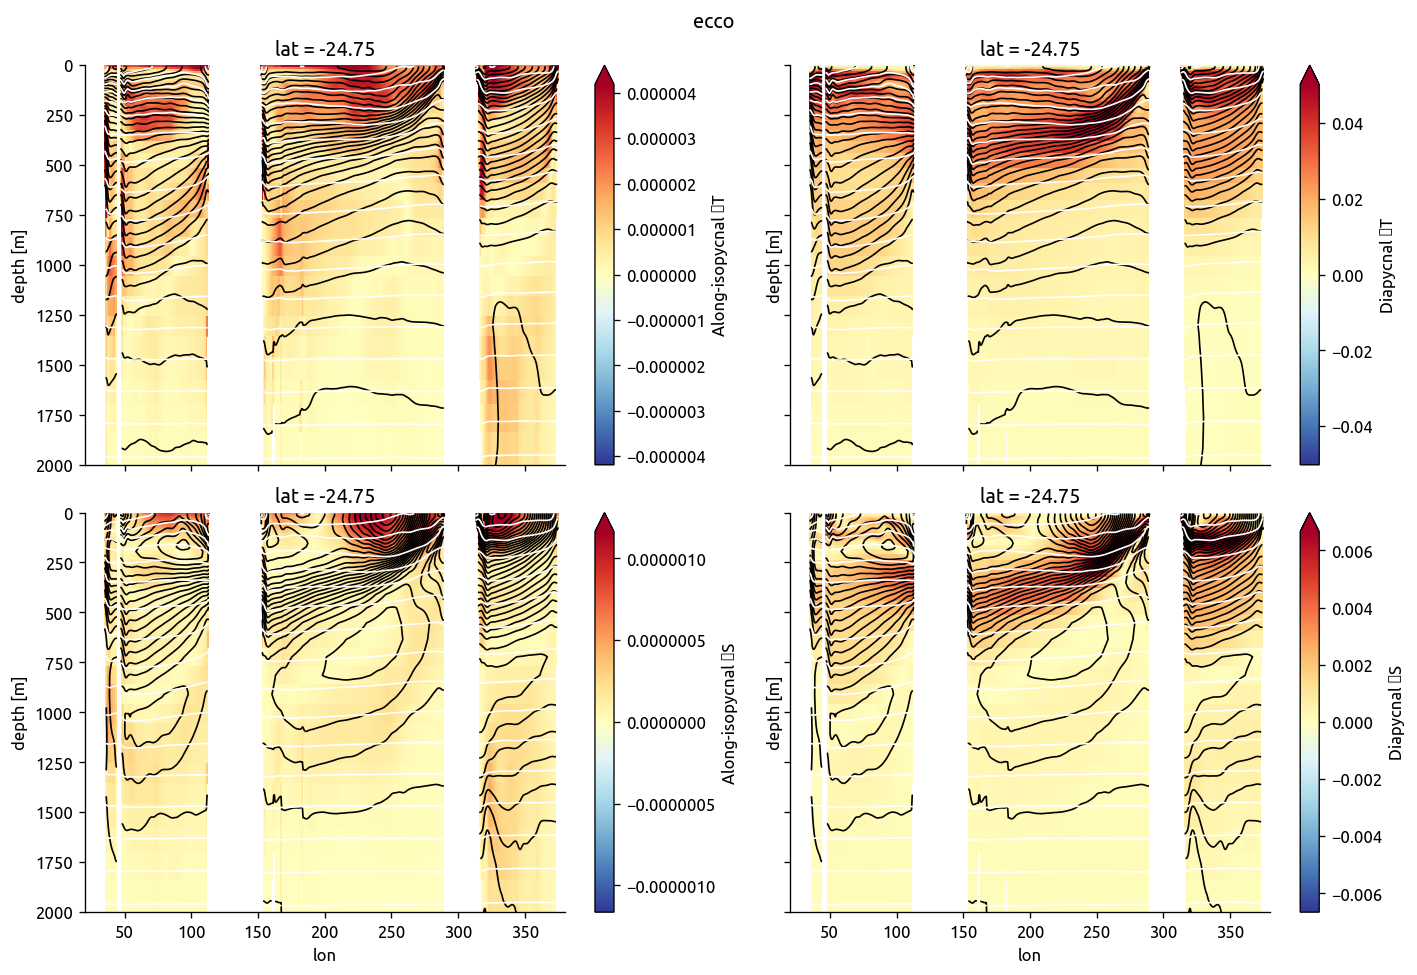

In [36]:
region = dict(lat=-25, method='nearest')
ax = plot_gradients(annual, region)

ax[0,0].set_ylim([2000, 0])

(1000, 0)

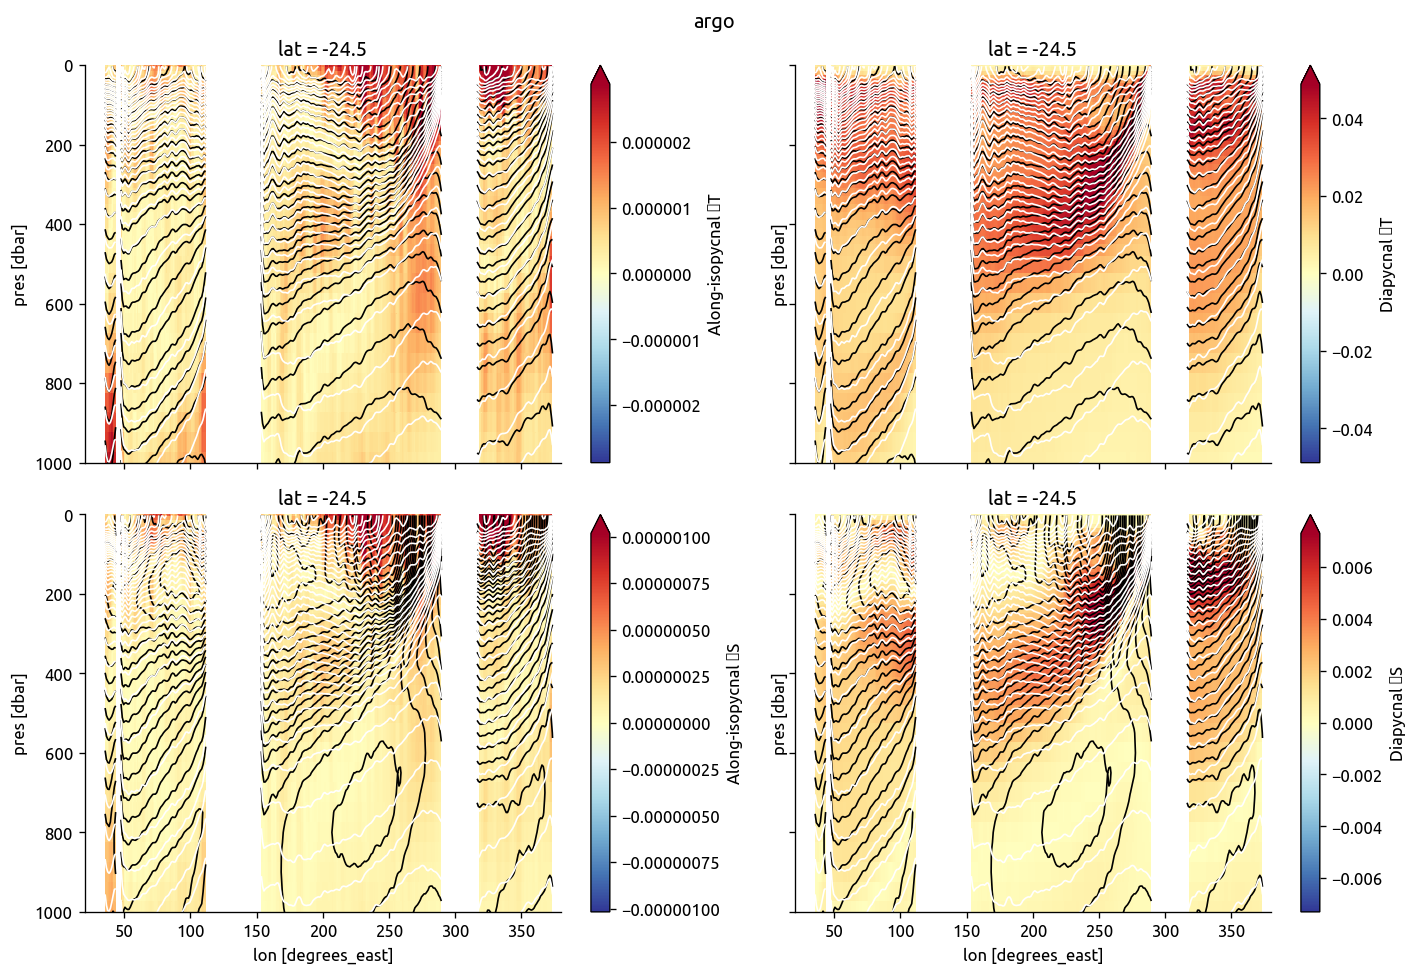

In [7]:
region = dict(lat=-25, method='nearest')
ax = plot_gradients(argo, region)
plt.gca().set_ylim([1000, 0])

Looks like the ECCO product (0.5°) is a lot smoother than the Argo 1° product. Maybe the interpolation from the tiles to a regular grid has something to do with it?

NameError: name 'argodT' is not defined

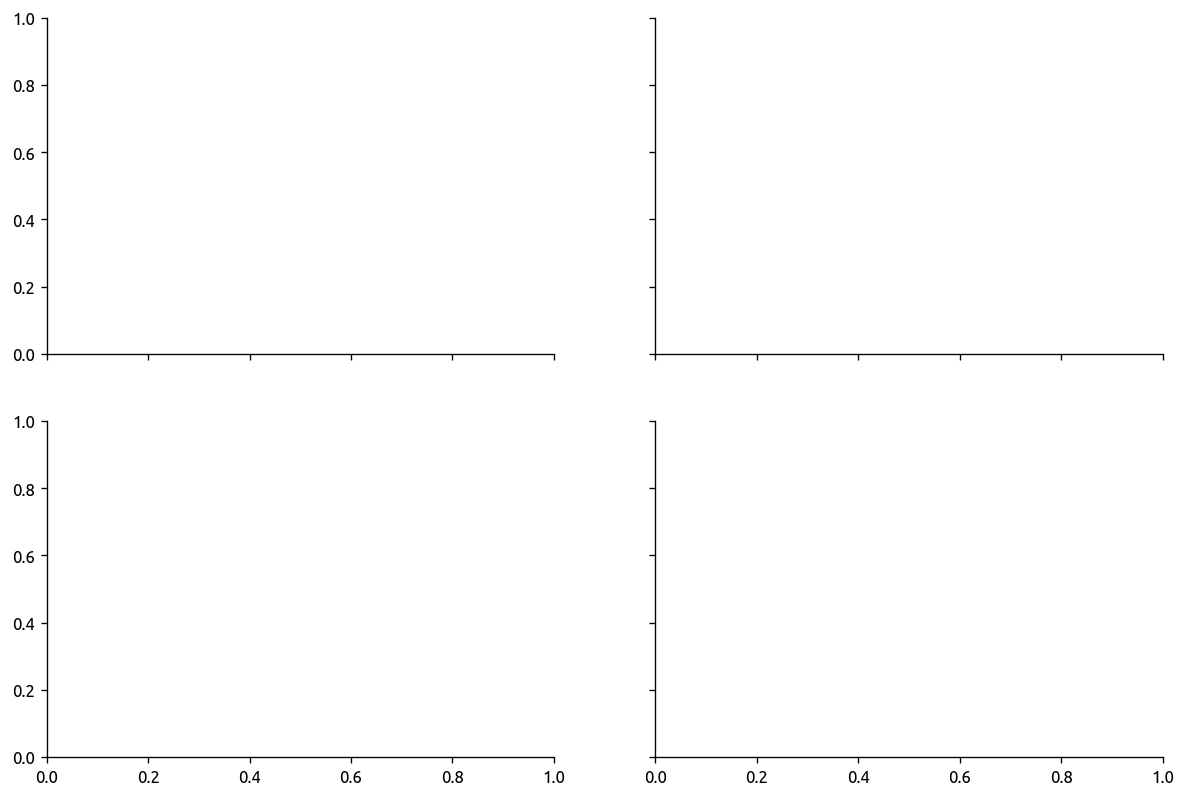

In [8]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True)

ax = ax.flat

f.set_size_inches(12, 8)

argodT.dx.sel(pres=50, method='nearest').plot(ax=ax[0], robust=True)
eccodT.dx.sel(pres=50, method='nearest').plot(ax=ax[2], robust=True)

argodT.dy.sel(pres=50, method='nearest').plot(ax=ax[1], robust=True)
eccodT.dy.sel(pres=50, method='nearest').plot(ax=ax[3], robust=True)

## Histograms

ECCO cannot represent the really low gradients seen in Argo. But maybe if I average out the Argo fields, I would do better? At current resolution, there is clear mesoscale signal in the fields.

In [ ]:
def log(input):
    input.values[input == 0] = np.nan
    return np.log10(input).values


tlim = [-8, -3]
slim = [-9, -4]
g = sns.jointplot(x=log(argo.dTiso),
                  y=log(annual.dTiso.interp(pres=argo.pres, 
                                            lat=argo.lat, 
                                            lon=argo.lon)),
                  kind='hex', xlim=tlim, ylim=tlim)
dcpy.plots.line45(ax=g.ax_joint)
g.ax_joint.set_xlabel('argo')
g.ax_joint.set_ylabel('ECCO')
g.fig.suptitle('Compare isopycnal |∇T| : ECCO, Argo, 2000db', y=1.05)

g = sns.jointplot(x=log(argo.dSiso),
                  y=log(annual.dSiso.interp(pres=argo.pres, 
                                            lat=argo.lat, 
                                            lon=argo.lon)),
                  kind='hex', xlim=slim, ylim=slim)
dcpy.plots.line45(ax=g.ax_joint)
g.set_axis_labels('argo', 'ECCO')
g.fig.suptitle("Compare isopycnal |∇S| : ECCO, Argo, 2000db", y=1.05)

## smooth argo

Smoothing the argo fields doesn't seem to make it look better?

In [ ]:
f, ax = plt.subplots(3,1, sharex=True, sharey=True)
f.set_size_inches(8, 10)
argodS.dy.sel(pres=50, method='nearest').plot(robust=True, ax=ax[0])

smooth = argodS.dy.copy()
smooth.values = sp.ndimage.filters.gaussian_filter(smooth.values, [2,2,0])
smooth.sel(pres=50, method='nearest').plot(robust=True, ax=ax[1])

eccodT.dy.sel(pres=50, method='nearest').plot(ax=ax[2], robust=True)